**Authors:** Kimberly Liu and Isaac Tabor

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

## Part 1: Downloading our dataset

* Clone the repo below and adjust file path as necessary to import data

In [80]:
! git clone https://github.com/kimberlyyliuu/EDA/

fatal: destination path 'EDA' already exists and is not an empty directory.


In [81]:
import pandas as pd

df = pd.read_excel('/content/EDA/lab/GSS.xlsx')
df.head()

,year,id_,age,sex,race,income06,rincom06,gunlaw,abany,owngun,conrinc,ballot
0,2010,1,31,MALE,Other,$75000 TO $89999,$75000 TO $89999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,66247.5,Ballot b
1,2010,2,23,FEMALE,White,$15000 TO 17499,$7 000 TO 7 999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,6022.5,Ballot b
2,2010,3,71,FEMALE,Black,$20000 TO 22499,.i: Inapplicable,FAVOR,NO,NO,-100.0,Ballot a
3,2010,4,82,FEMALE,White,$8 000 TO 9 999,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,Ballot b
4,2010,5,78,FEMALE,Black,.d: Do not Know/Cannot Choose,.i: Inapplicable,FAVOR,.n: No answer,NO,-100.0,Ballot c


## Part 2: Data Description and Background

**Data Description and Background**

> As mentioned above, the data we collected comes from the General Social Survey (GSS), a bi-annual nationally representative American  survey of Americans with an abundant of variables to choose from. In short, it is very good data on a lot of interesting topics. We chose to extract 12 variables to form a dataset of 11,771 entries.

> Our dataset primarily surrounds capturing attitudes on particular social issues of interest. Specifically, we selected the gunlaw variable, which contains an OPPOSE or FAVOR response to the question, "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" Additionally, we chose the abany vaiable, which is a response to whether the respondent believes it should be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason.

> To support those primary variables of interest, we also collected the year variable, which corresponds to the  GSS year for the respondent, and the id_ variable, which is a respondent's unique identification number. Additionally, we gathered demographic and economic information on each respondent.


> The demographic variables we collected are age, sex, race, and owngun (whether someone has a gun or revolver in their house or garage). The economic variables we gathered on each respondent are income06 and rincome06, which refer to total family and respondent income, respectively. This income data is available for years 2006, 2008, 2010, 2012, and 2014. Additionally, we gathered conrincome, which is inflation adjusted personal income.

> With this data collected, we felt confident in being able to form an analysis on public opinion on controversial topics, and gain a deeper perspective of American society on these issues.   



## Part 3: Data Cleaning with Explanation of Choices


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11771 entries, 0 to 11770
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11771 non-null  int64  
 1   id_       11771 non-null  int64  
 2   age       11771 non-null  object 
 3   sex       11771 non-null  object 
 4   race      11771 non-null  object 
 5   income06  11771 non-null  object 
 6   rincom06  11771 non-null  object 
 7   gunlaw    11771 non-null  object 
 8   abany     11771 non-null  object 
 9   owngun    11771 non-null  object 
 10  conrinc   11771 non-null  float64
 11  ballot    11771 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB




*   From this concise summary and the first five rows of the dataframe, we can immediately see that **age**, **income06**, and **rincome06** are not appropriately stored as numeric variables



**Cleaning age column**

In [83]:
df['age'].unique()

array(['31', '23', '71', '82', '78', '40', '46', '80', '.n:  No answer',
       '21', '58', '36', '57', '28', '84', '51', '35', '49', '56', '88',
       '26', '33', '53', '63', '34', '75', '43', '83', '69', '24', '25',
       '66', '20', '37', '64', '45', '60', '22', '72', '42', '54', '41',
       '19', '44', '50', '39', '48', '38', '55', '59', '68', '61', '65',
       '27', '32', '52', '47', '70', '30', '29', '67', '89 or older',
       '18', '76', '79', '73', '62', '77', '85', '81', '86', '74', '87'],
      dtype=object)



*   By analyzing unique values, we can see that values **'.n:  No answer',** and **'89 or older'** need to be cleaned

*   We decided that '.n: No answer' should be replaced with np.nan to be treated appropriately with data analysis

*   We decided that '89 or older' should be replaced with 89 to preserve the dataset's numeric integrity and to minimize assumptions because we felt it would be too speculative to assign 95, for example.







In [84]:
import numpy as np

# Cleaning age column

df['age'] = df['age'].replace({
    '.n:  No answer': np.nan,
    '89 or older': 89
})

df['age'] = pd.to_numeric(df['age'])

print(df['age'].unique())
print(df['age'].dtype)

[31. 23. 71. 82. 78. 40. 46. 80. nan 21. 58. 36. 57. 28. 84. 51. 35. 49.
 56. 88. 26. 33. 53. 63. 34. 75. 43. 83. 69. 24. 25. 66. 20. 37. 64. 45.
 60. 22. 72. 42. 54. 41. 19. 44. 50. 39. 48. 38. 55. 59. 68. 61. 65. 27.
 32. 52. 47. 70. 30. 29. 67. 89. 18. 76. 79. 73. 62. 77. 85. 81. 86. 74.
 87.]
float64


**Cleaning income columns**

In [85]:
df['income06'].unique()

array(['$75000 TO $89999', '$15000 TO 17499', '$20000 TO 22499',
       '$8 000 TO 9 999', '.d:  Do not Know/Cannot Choose',
       '$10000 TO 12499', '.r:  Refused', '$50000 TO 59999',
       '$40000 TO 49999', '$90000 TO $109999', '$22500 TO 24999',
       '$4 000 TO 4 999', '$12500 TO 14999', '$60000 TO 74999',
       '$3 000 TO 3 999', '$150000 OR OVER', '$5 000 TO 5 999',
       '$130000 TO $149999', '$17500 TO 19999', '$25000 TO 29999',
       '$110000 TO $129999', '$30000 TO 34999', 'UNDER $1 000',
       '$35000 TO 39999', '$1 000 TO 2 999', '$7 000 TO 7 999',
       '$6 000 TO 6 999', '.i:  Inapplicable'], dtype=object)

In [86]:
df['year'].unique()

array([2010, 2012, 2014, 2016, 2018])



*   Noting here that in gss documentation, it has income06 and rincome06 had data available for years 2006, 2008, 2010, 2012, and 2014, and our data ranges for 2010-2018



* We could clean this or we could just use **conrincome** since that is inflation-adjusted and a clean numeric value.

In [87]:
df['conrinc'].describe()

,conrinc
count,11771.000000
mean,20298.998512
std,34123.643742
min,-100.000000
25%,-100.000000
50%,6309.000000
75%,30112.500000
max,324512.292140


In [88]:
(df['conrinc'] == -100).sum() / len(df)

0.41670206439554835

In [89]:
sum(df['conrinc'].isna())

0

*   It appears that for **conrinc**, -100 is being used to report unknown income and that accounts for 41.67% of our conrinc data.


In [90]:
df[df['conrinc'] == -100].groupby('year').size()

,0
year,
2010,842
2012,828
2014,1015
2016,1235
2018,985




*   The missing data is not disproprotinately associated with one year or anything

For now, we will replace these values with np.nan to treat these values appropriately in data analysis.






In [91]:
df['conrinc'] = df['conrinc'].replace(-100, np.nan)

**Checking Other Columns**

In [92]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [93]:
df['race'].unique()

array(['Other', 'White', 'Black'], dtype=object)


*   This is important to note in our analysis



In [94]:
df['gunlaw'].unique()

array(['.i:  Inapplicable', 'FAVOR', 'OPPOSE',
       '.d:  Do not Know/Cannot Choose', '.n:  No answer'], dtype=object)

In [95]:
df['abany'].unique()

array(['.i:  Inapplicable', 'NO', '.n:  No answer', 'YES',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

In [96]:
df['owngun'].unique()

array(['.i:  Inapplicable', 'NO', 'YES', 'REFUSED',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

In [97]:
df['ballot'].unique()

array(['Ballot b', 'Ballot a', 'Ballot c'], dtype=object)


*   We could merge '.i:  Inapplicable', '.d:  Do not Know/Cannot Choose', '.n:  No answer', and/or 'REFUSED', but they are each a little different I suppose, so I am not sure it is necessary. I feel it could go either way

*   We could also replace those categories with np.nans.

*   Ultimately, I think it depends on whether we feel the distinction is important for our analysis and/or the best representation of public opinion, which I think the distinction may be worthwhile, especially for those who "Do not know / Cannot Choose."




In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11771 entries, 0 to 11770
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11771 non-null  int64  
 1   id_       11771 non-null  int64  
 2   age       11737 non-null  float64
 3   sex       11771 non-null  object 
 4   race      11771 non-null  object 
 5   income06  11771 non-null  object 
 6   rincom06  11771 non-null  object 
 7   gunlaw    11771 non-null  object 
 8   abany     11771 non-null  object 
 9   owngun    11771 non-null  object 
 10  conrinc   6866 non-null   float64
 11  ballot    11771 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB




*   Cleaned concise summary of our dataset.



## Part 4: Numeric Summaries and Visualizations

**Research Question 1: How does gun ownership correlate with views on gun laws?**

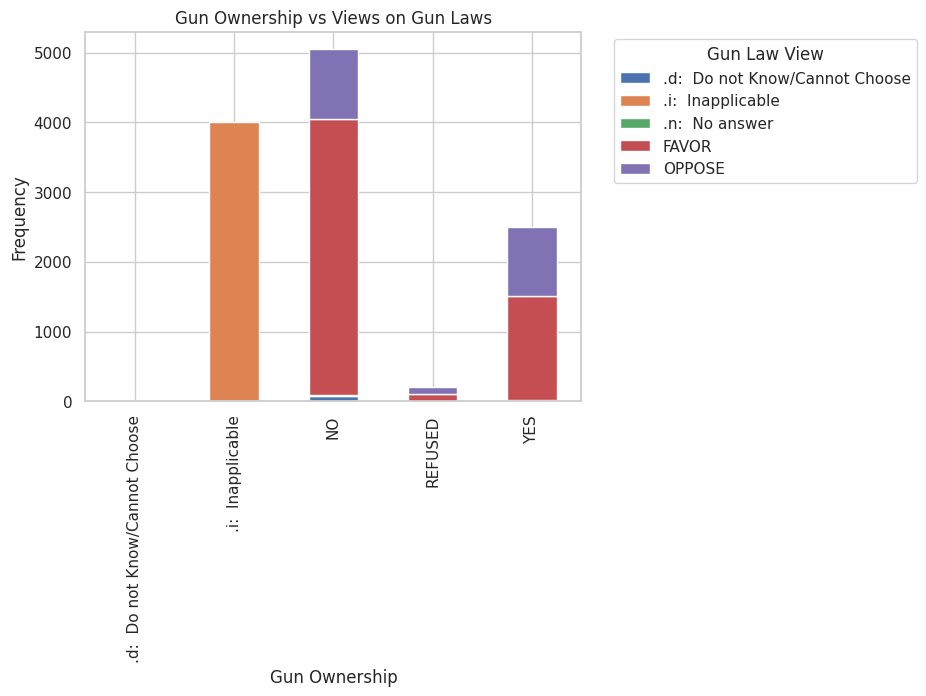

In [99]:
# Cross-tabulation between gun ownership and views on gun laws
pd.crosstab(df['owngun'], df['gunlaw']).plot(kind='bar', stacked=True)
plt.title('Gun Ownership vs Views on Gun Laws')
plt.xlabel('Gun Ownership')
plt.ylabel('Frequency')

plt.legend(title='Gun Law View', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



*   Note, this shows frequency counts as opposed to percentages, and presentation could improve. I like the visualization below better


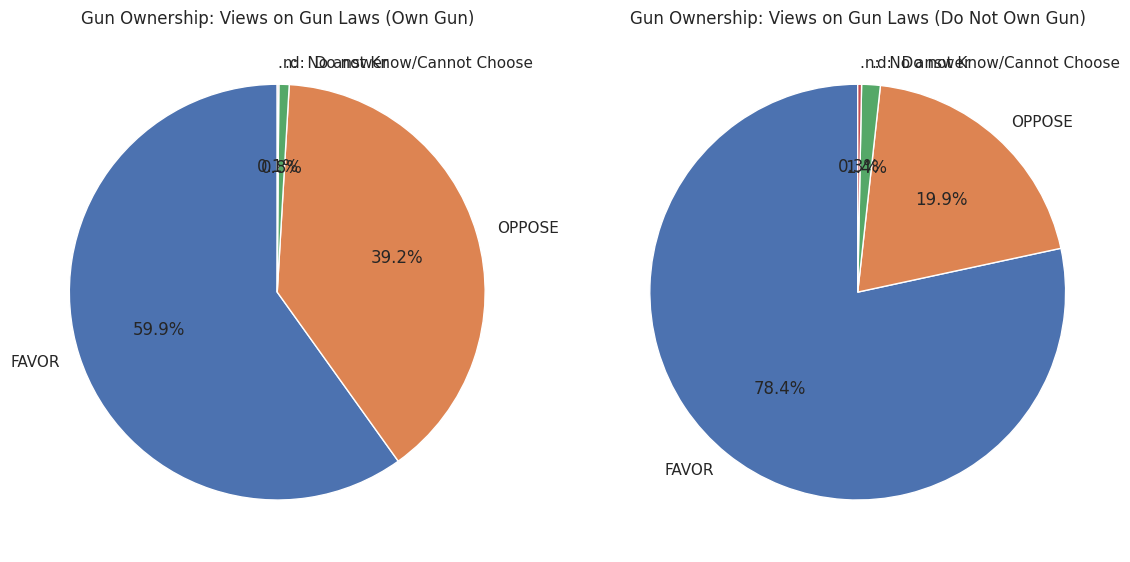

In [100]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for people who own guns
own_gun = df[df['owngun'] == 'YES']
own_gun_gunlaw = own_gun['gunlaw'].value_counts()
axes[0].pie(own_gun_gunlaw, labels=own_gun_gunlaw.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Gun Ownership: Views on Gun Laws (Own Gun)')

# Plot for people who do not own guns
no_own_gun = df[df['owngun'] == 'NO']
no_own_gun_gunlaw = no_own_gun['gunlaw'].value_counts()
axes[1].pie(no_own_gun_gunlaw, labels=no_own_gun_gunlaw.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gun Ownership: Views on Gun Laws (Do Not Own Gun)')

# Show the plot
plt.tight_layout()
plt.show()




*   For those who own a gun, 59.9% responded in favor of gun laws which would require a person to obtain a police permit before he or she could buy a gun, while for those who do not own a gun, 78.4% favor gun laws that would require a police permit.
*   19.9% of those who do not own a gun oppose gun laws that would require a police permit to buy a gun, which is much less than the 39.2% of gun-owners who oppose such a law.
*   While it seems like less gun-owners favor a law requiring a police permit to own a gun, I do think it is interesting to note that still a majority of gun-owner respondents favor such a gun law, and it could be interesting to see how many states do require such a permit.





**RQ2: Do opinions on abortion differ by gender and/or age?**

<ipython-input-101-35a439e4729f>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


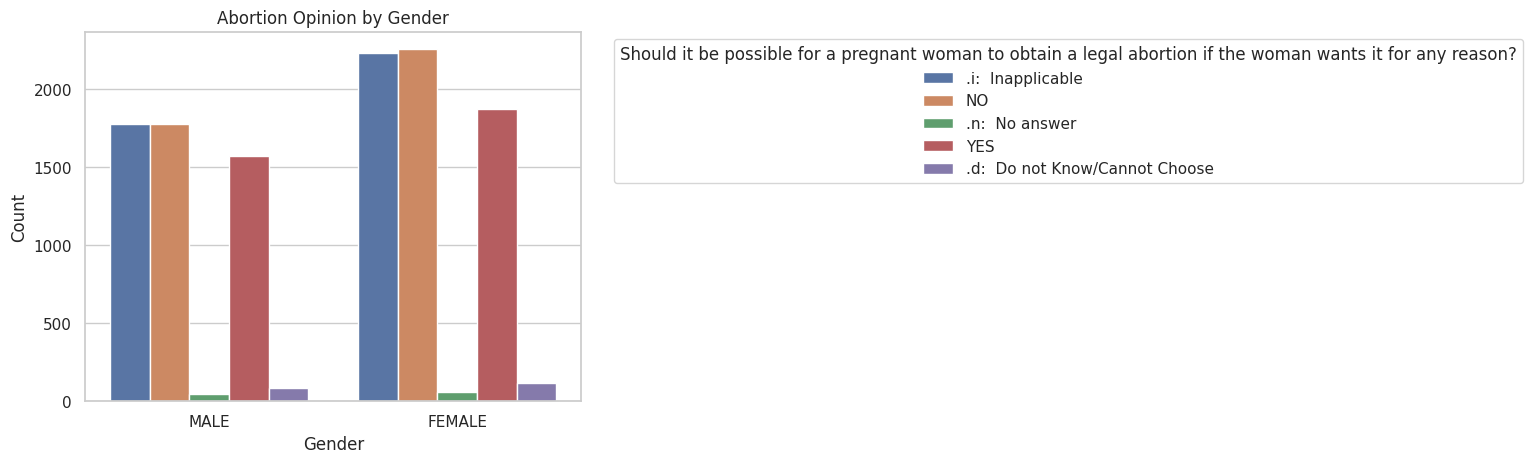

<ipython-input-101-35a439e4729f>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


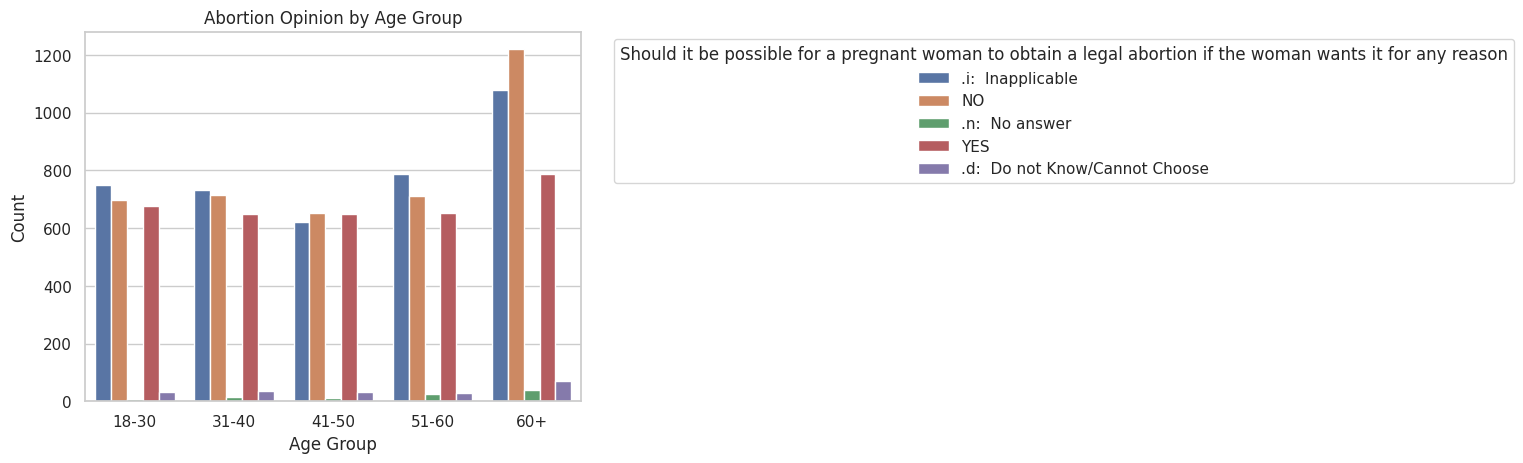

In [101]:
import seaborn as sns

# Compare abortion opinions by gender
sns.countplot(data=df, x='sex', hue='abany')
plt.title('Abortion Opinion by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Should it be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason?', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend off to the side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Compare abortion opinions by age group
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
sns.countplot(data=df, x='age_group', hue='abany')
plt.title('Abortion Opinion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Should it be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend off to the side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




*   It could be interesting to see if it differs by income level too if we clean that more
*   It is interesting how many people responded with inapplicable.
*   Seems like most people are saying no.
*   This is across all years.
*   Could make this prettier










**RQ3: How has abortion opinion changed overtime?**

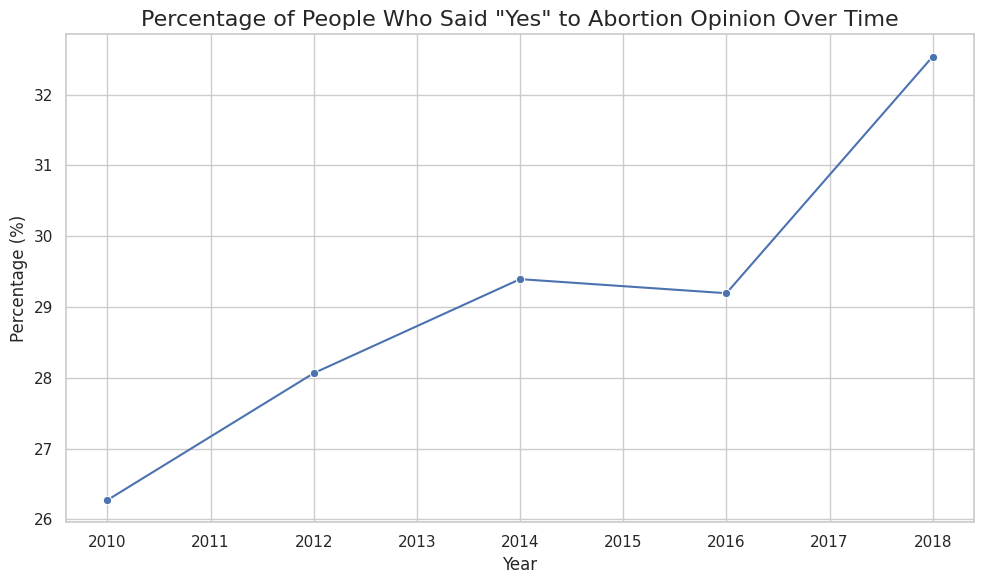

In [102]:
import seaborn as sns

# Calculate percentage of "Yes" responses to 'abany' by year
df_abany = df.groupby('year')['abany'].value_counts(normalize=True).unstack().fillna(0)
df_abany['pct_yes'] = df_abany['YES'] * 100  # Convert proportion to percentage

# Create the lineplot for pct_yes over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_abany, x=df_abany.index, y='pct_yes', marker='o', color='b')

# Title and labels
plt.title('Percentage of People Who Said "Yes" to Abortion Opinion Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()




*   This is very interesting
*   Should probably include the exact question in the graph
*   This also includes inapplicable answer so important to also show that 30% in favor for example, does not necessarily mean 70% opposed.





**RQ4: How do views on abortion differ by attitudes on gun laws?**

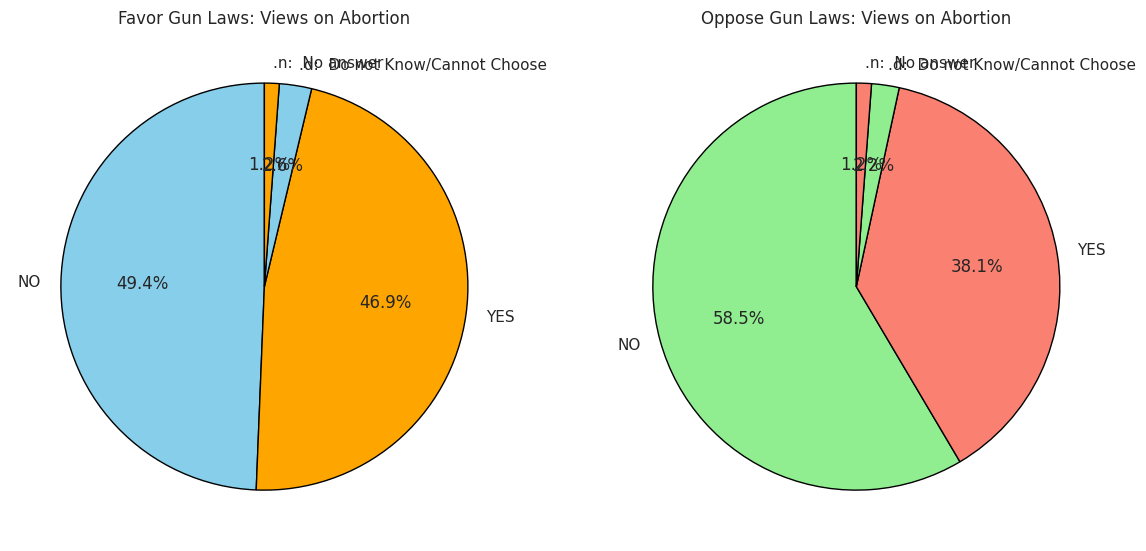

In [108]:
# Filter data for people who favor gun laws
favor_gun = df[df['gunlaw'] == 'FAVOR']  # Replace 'FAVOR' with the actual label for those who favor gun laws
# Filter data for people who oppose gun laws
oppose_gun = df[df['gunlaw'] == 'OPPOSE']  # Replace 'OPPOSE' with the actual label for those who oppose gun laws

# Count abortion opinions for those who favor and oppose gun laws
abany_favor_gun = favor_gun['abany'].value_counts()
abany_oppose_gun = oppose_gun['abany'].value_counts()

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for people who favor gun laws
axes[0].pie(abany_favor_gun, labels=abany_favor_gun.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'],
            wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Favor Gun Laws: Views on Abortion')

# Pie chart for people who oppose gun laws
axes[1].pie(abany_oppose_gun, labels=abany_oppose_gun.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'],
            wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Oppose Gun Laws: Views on Abortion')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




*   I find this particularly interesting because oppose gun == less government intervention, but those who oppose gun laws are more against abortion (more government intervention)

